In [2]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [167]:
f = r.TFile("./data/col_6_inner_bottom.root")
f.cd("trajectoryAnalyzer")
f.ls()

TFile**		./data/col_6_inner_bottom.root	
 TFile*		./data/col_6_inner_bottom.root	
  TDirectoryFile*		trajectoryAnalyzer	trajectoryAnalyzer (TrajectoryAnalyzer) folder
   KEY: TH3I	collimatorHits;1	Collimator Hits
   KEY: TTree	t;1	t
  KEY: TDirectoryFile	simuTreeMaker;1	simuTreeMaker (SimuTreeMaker) folder
  KEY: TDirectoryFile	trajectoryAnalyzer;1	trajectoryAnalyzer (TrajectoryAnalyzer) folder


In [168]:
t = f.Get("trajectoryAnalyzer/t")
t.Print()

******************************************************************************
*Tree    :t         : t                                                      *
*Entries :     3000 : Total =          901905 bytes  File  Size =     388830 *
*        :          : Tree compression factor =   2.31                       *
******************************************************************************
*Br    0 :caloX     : vector<float>                                          *
*Entries :     3000 : Total  Size=      75912 bytes  File Size  =      43365 *
*Baskets :        3 : Basket Size=      32000 bytes  Compression=   1.74     *
*............................................................................*
*Br    1 :caloY     : vector<float>                                          *
*Entries :     3000 : Total  Size=      75912 bytes  File Size  =      45207 *
*Baskets :        3 : Basket Size=      32000 bytes  Compression=   1.67     *
*...................................................

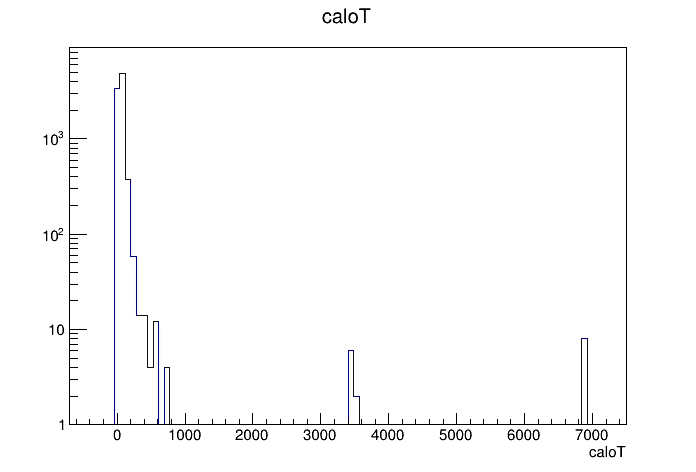

In [227]:
c = r.TCanvas()
t.Draw("caloT")
c.SetLogy()
c.Draw()

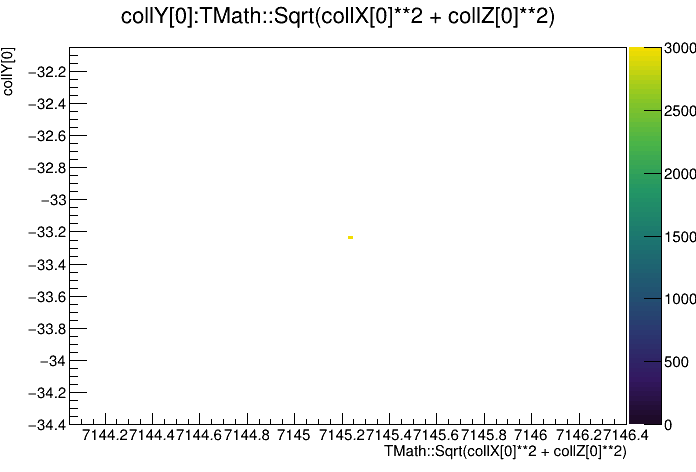

In [228]:
c = r.TCanvas()
t.Draw("collY[0]:TMath::Sqrt(collX[0]**2 + collZ[0]**2)","","colz")
c.Draw()

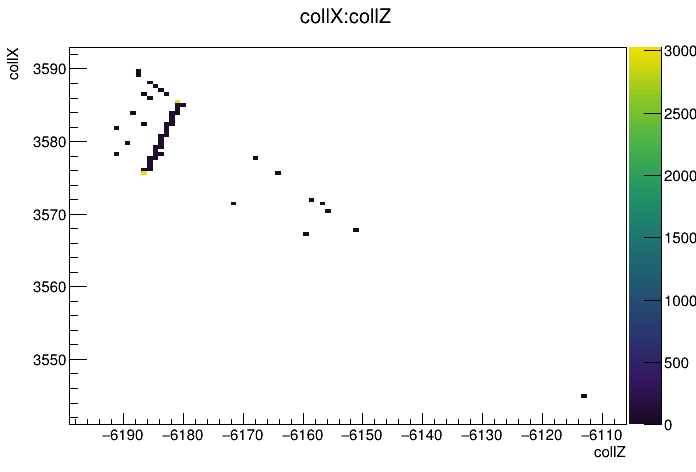

In [229]:
c = r.TCanvas()
t.Draw("collX:collZ","","colz")
c.Draw()

In [171]:
calos = []
for i, e in enumerate(t):
    if(e.caloNum.size() < 5):
        continue
    #print([x for x in e.caloNum])
    calos.append(e.caloNum[0]+1)

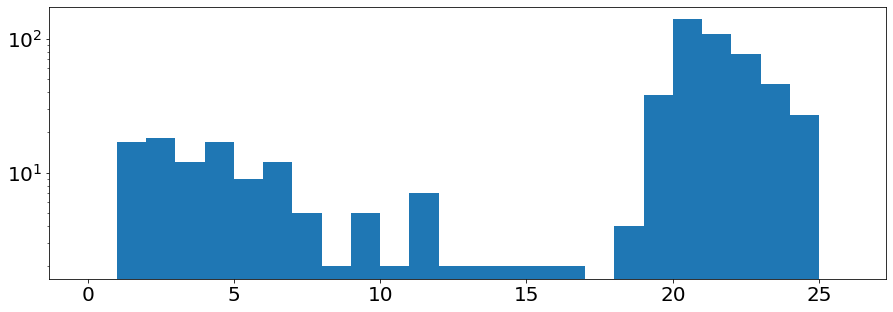

In [172]:
fig,ax = plt.subplots(figsize=(15,5))
plt.hist(calos,range=(0,26), bins=26)
plt.yscale("log")
plt.show()

---

### Now lets loop over all of the files

In [284]:
files = [
    "./data/col_6_inner_top.root", 
    "./data/col_6_inner_bottom.root", 
    "./data/col_6_outer_top.root", 
    "./data/col_6_outer_bottom.root", 
    "./data/col_8_inner_top.root", 
    "./data/col_8_inner_bottom.root", 
    "./data/col_8_outer_top.root",
    "./data/col_8_outer_bottom.root"
]

files = [
    "./data/col_6_inner_top_bothin.root", 
    "./data/col_6_inner_bottom_bothin.root", 
    "./data/col_6_outer_top_bothin.root", 
    "./data/col_6_outer_bottom_bothin.root", 
    "./data/col_8_inner_top_bothin.root", 
    "./data/col_8_inner_bottom_bothin.root", 
    "./data/col_8_outer_top_bothin.root",
    "./data/col_8_outer_bottom_bothin.root"
]

names = [x.split("data/")[1].split('.root')[0] for x in files]
print(names)

['col_6_inner_top_bothin', 'col_6_inner_bottom_bothin', 'col_6_outer_top_bothin', 'col_6_outer_bottom_bothin', 'col_8_inner_top_bothin', 'col_8_inner_bottom_bothin', 'col_8_outer_top_bothin', 'col_8_outer_bottom_bothin']


In [11]:
df_full = pandas.read_csv("./data/python_output_may10.csv")
df = df_full.sample(10000)

In [61]:
df.head()

,Unnamed: 0,filenum,name,collimator_set,in-out,top-bot,coll,calo,collR,collY,caloR,caloY,goodtriples,efficiency,drifttime,corner_num
2759222,2759222,4,6_inner_top_00215,6,inner,top,6,18,7078.766002,33.23402,7018.061308,20.364582,1021910,0.289014,17.129055,10
2476219,2476219,4,6_inner_top_00215,6,inner,top,6,4,7078.766002,33.23402,7014.767049,41.567459,1021910,0.289014,674.031012,10
1893338,1893338,3,8_outer_bottom_00087,8,outer,bottom,8,4,7145.234261,-33.23402,7009.237833,-12.291313,514672,0.279487,54.408874,1
4249475,4249475,6,6_outer_top_00071,6,outer,top,6,21,7145.234173,33.23402,6987.409616,-12.584245,988402,0.280103,35.816025,0
1418207,1418207,2,8_outer_top_00141,8,outer,top,8,0,7145.234261,33.23402,7007.697328,38.174564,516593,0.281548,29.589121,0


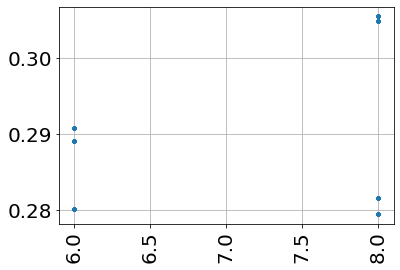

In [60]:
plt.plot(df['collimator_set'], df['efficiency'],".")
plt.xticks(rotation=90)
plt.grid()
plt.show()

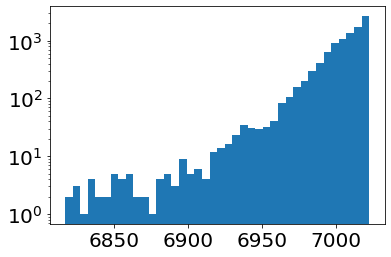

In [64]:
plt.hist(df['caloR'],bins=40)
plt.yscale("log")
plt.show()

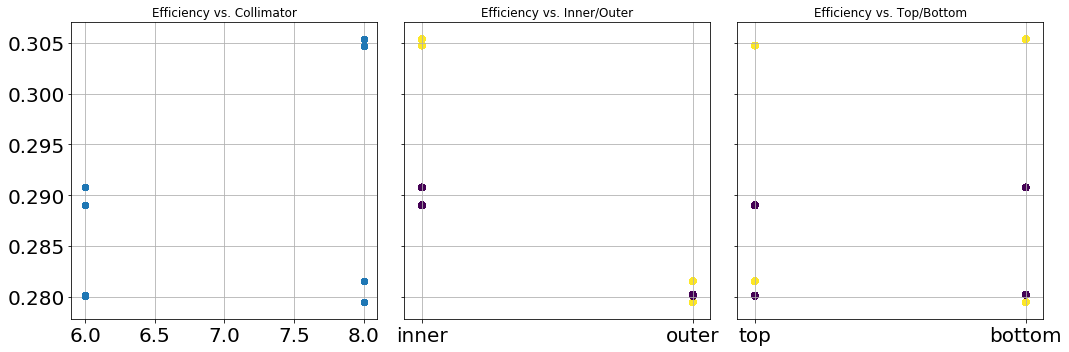

In [5]:
fig,ax = plt.subplots(1,3,figsize=(15,5), sharey=True)

axi = ax[0]
axi.plot(df['coll'], df['efficiency'],"o")
axi.set_title("Efficiency vs. Collimator")

axi = ax[1]
scatter = axi.scatter(df['in-out'], df['efficiency'], c = df['corner'])
axi.set_title("Efficiency vs. Inner/Outer")

legend1 = axi.legend(*scatter.legend_elements(),
                    #loc="lower left", 
                    title="Corner", 
                    ncol=2)
axi.add_artist(legend1)


axi = ax[2]
axi.scatter(df['top-bot'], df['efficiency'], c = df['coll'])
axi.set_title("Efficiency vs. Top/Bottom")

for axi in ax:
    axi.grid()
    
plt.tight_layout()
plt.show()

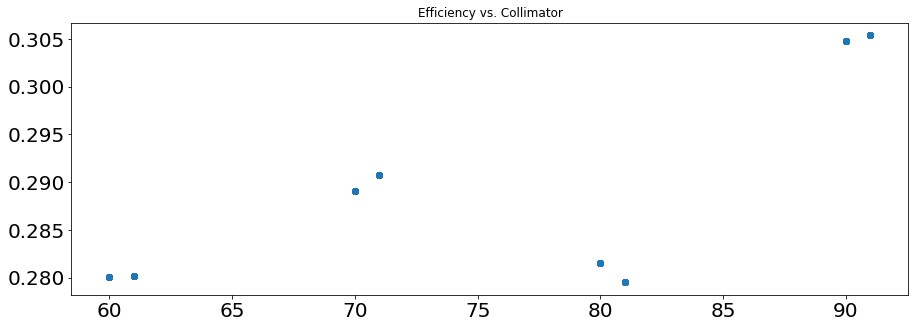

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df['coll']*10+df['corner_num'], df['efficiency'],"o")
ax.set_title("Efficiency vs. Collimator")
plt.show()

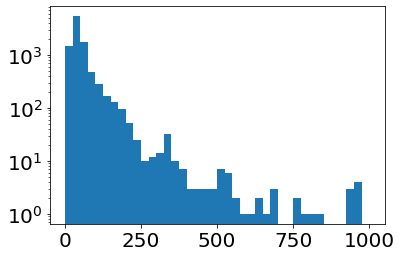

In [17]:
plt.hist(df['drifttime'],bins=40, range=(0,1000))
plt.yscale("log")
plt.show()

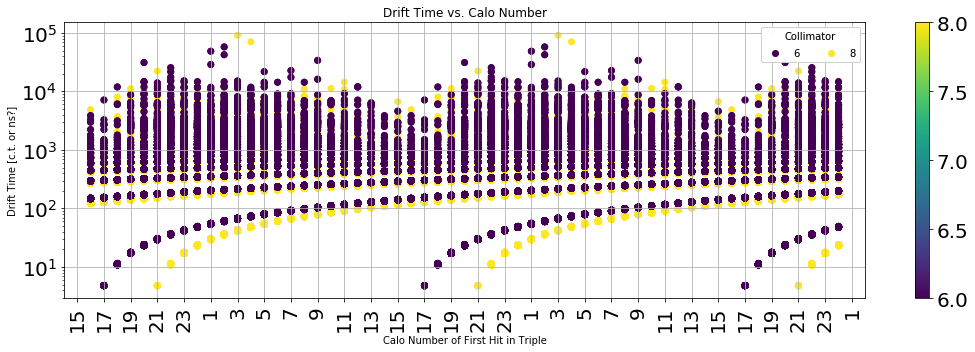

In [8]:
fig,ax = plt.subplots(figsize=(15,5))

if(True):
    splitcalo = 15
    dfi = df.loc[df['calo'] >= splitcalo]
    plt.scatter(dfi['calo']+1-24, dfi['drifttime'], c=dfi['coll'])
    plt.scatter(df['calo']+1+24, df['drifttime'], c=df['coll'])
    
    plt.xticks([x for x in range(splitcalo-24, 500,2)], labels=[x%24 for x in range(splitcalo-24, 500,2)],
              rotation=90)
scatter = plt.scatter((df['calo']+1), df['drifttime'],c=df['coll'])
plt.colorbar()
plt.yscale("log")
plt.title("Drift Time vs. Calo Number")
plt.ylabel("Drift Time [c.t. or ns?]")
plt.xlabel("Calo Number of First Hit in Triple")
plt.grid()

legend1 = ax.legend(*scatter.legend_elements(),
                    #loc="lower left", 
                    title="Collimator", 
                    ncol=2)
ax.add_artist(legend1)

'''handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, title="Efficiency", loc=4)'''

plt.xlim(-10,50)
plt.tight_layout()
plt.show()

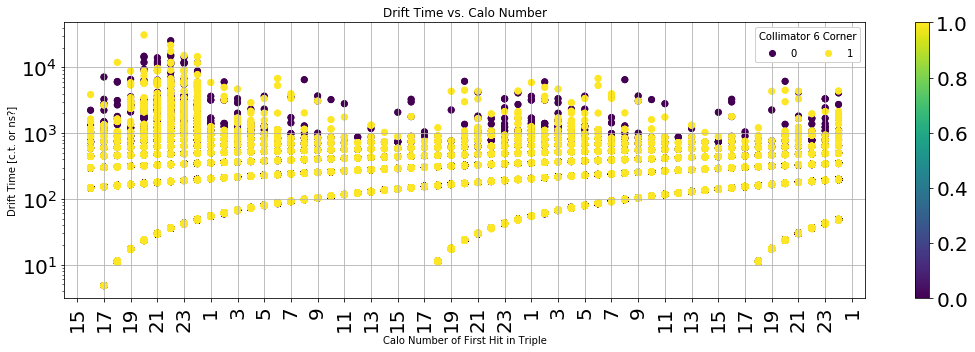

In [9]:
fig,ax = plt.subplots(figsize=(15,5))

collimator = 6
dfii = df.loc[df['coll'] == collimator].loc[df['corner_num'] < 9]

if(True):
    splitcalo = 15
    dfi = df.loc[df['calo'] >= splitcalo].loc[df['coll'] == collimator].loc[df['corner_num'] > 9]
    plt.scatter(dfi['calo']+1-24, dfi['drifttime'], c=dfi['corner_num'])
    plt.scatter(dfii['calo']+1+24, dfii['drifttime'], c=dfii['corner_num'])
    
    plt.xticks([x for x in range(splitcalo-24, 500,2)], labels=[x%24 for x in range(splitcalo-24, 500,2)],
              rotation=90)
scatter = plt.scatter((dfii['calo']+1), dfii['drifttime'],c=dfii['corner_num'])
plt.colorbar()
plt.yscale("log")
plt.title("Drift Time vs. Calo Number")
plt.ylabel("Drift Time [c.t. or ns?]")
plt.xlabel("Calo Number of First Hit in Triple")
plt.grid()

legend1 = ax.legend(*scatter.legend_elements(),
                    #loc="lower left", 
                    title="Collimator "+str(collimator)+" Corner", 
                    ncol=2)
ax.add_artist(legend1)

'''handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, title="Efficiency", loc=4)'''

plt.xlim(-10,50)
plt.tight_layout()
plt.show()

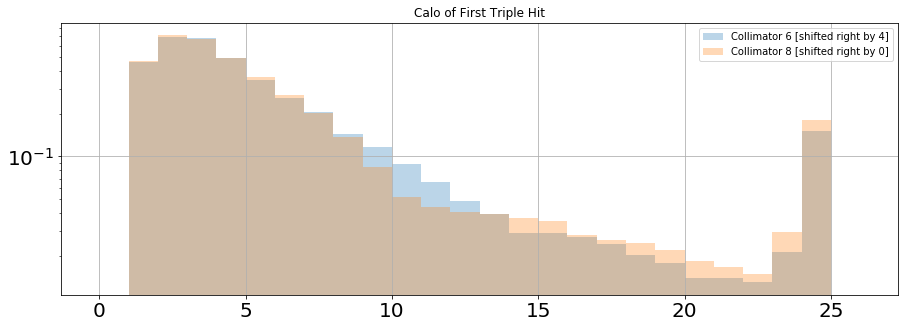

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
for coll in [6,8]:
    dfi = df.loc[df['coll'] == coll]
    if coll == 6:
        offset = 4
    else:
        offset = 0
    plt.hist(((dfi['calo']+1+offset)%24)+1, range=(0,26), bins=26 ,
             label="Collimator "+str(coll)+" [shifted right by "+str(offset)+"]", alpha=0.3, weights=1./dfi['goodtriples'])
plt.legend()
plt.title("Calo of First Triple Hit")
plt.yscale("log")
plt.grid()
plt.show()

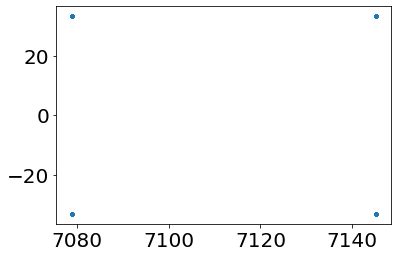

In [264]:
plt.plot(df['collR'], df['collY'],".")
#plt.yscale("log")
plt.show()

---

### Now lets look at the output from the root file

In [73]:
f = r.TFile("./data/histograms_collimator.root")
f.ls()

TFile**		./data/histograms_collimator.root	
 TFile*		./data/histograms_collimator.root	
  KEY: TH2I	hithist;1	Collimator + Calo Hits in the Ring
  KEY: TH3I	nhitsvscalo;1	Number of Calo Entries vs. First Calo Hit vs. Collimator
  KEY: TH2I	drifttime;1	Drift Time vs. First Calo Hit
  KEY: TH3I	yposvscorner;1	y-Position of Calo Hit vs. Corner of Collimator


In [74]:
hithist = f.Get("hithist").Clone()

In [75]:
nhitsvscalo = f.Get("nhitsvscalo").Clone()

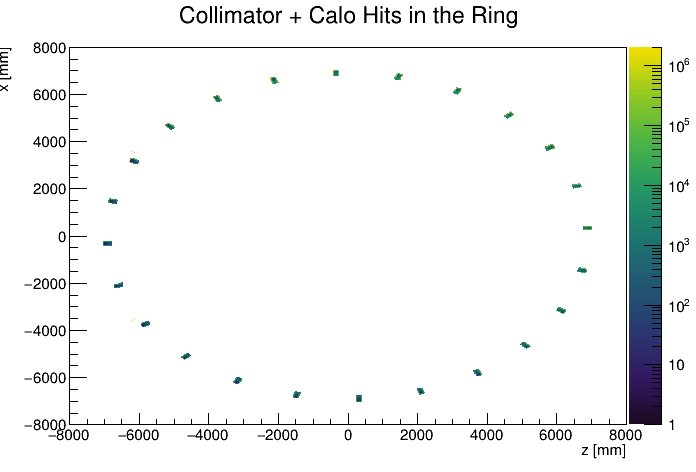

In [77]:
c = r.TCanvas()
hithist.Draw("colz")
c.SetLogz()
c.Draw()

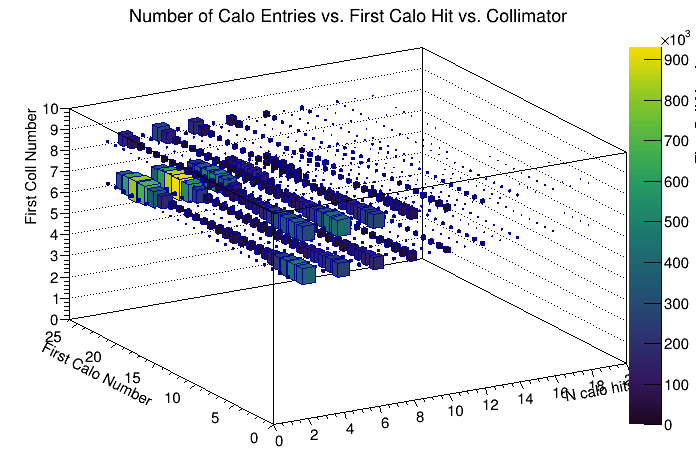

In [78]:
c = r.TCanvas()
nhitsvscalo.Draw("lego2z")
c.Draw()

### Lets get the ratio of triples to quadruples by calorimeter

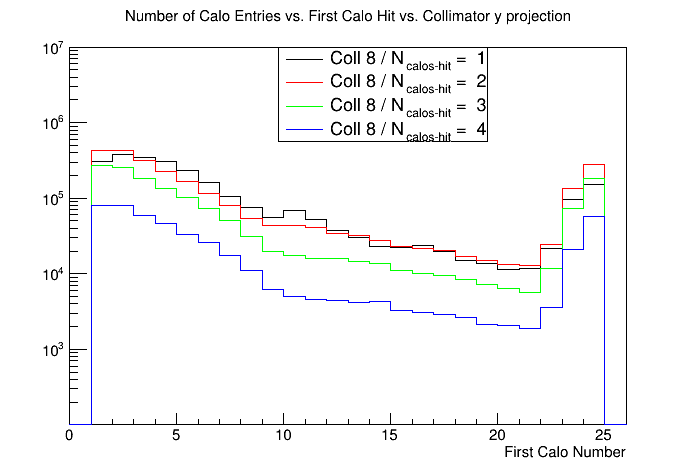

In [104]:
hitnums = [1,2,3,4]
collimators = [8]
c = r.TCanvas()

leg = r.TLegend(0.4,0.7,0.7,0.9)
hists = []

counter = 0
for hit in hitnums:
    for coll in collimators:
        hitbin = nhitsvscalo.GetXaxis().FindBin(hit*2)
        collbin = nhitsvscalo.GetZaxis().FindBin(coll)
        nhitsvscalo.GetXaxis().SetRange( hitbin-1, hitbin )
        nhitsvscalo.GetZaxis().SetRange( collbin, collbin )
        
        hi = nhitsvscalo.Project3D("y").Clone()
        hi.SetLineColor(counter+1)
        hi.GetYaxis().SetRangeUser(100,10000000)
        hists.append(hi.Clone(str(coll)+"_"+str(hit)))
        leg.AddEntry(hists[counter], "Coll "+str(coll)+" / N_{ calos-hit} =  "+str(hit), "l")
        
        if(counter == 0):
            hi.DrawCopy("hist")
        else:
            hi.DrawCopy("hist same")
        counter += 1
leg.Draw()
c.SetLogy()
c.Draw()

0.29830617363072137


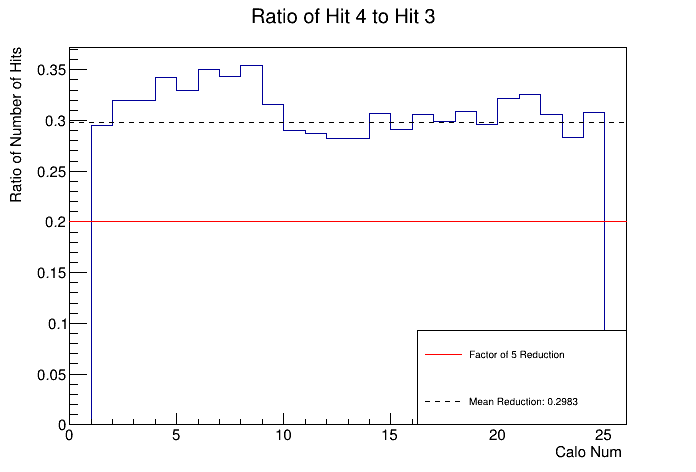

In [102]:
r1 = 4
r2 = 3
coll = 8

hitbin = nhitsvscalo.GetXaxis().FindBin(r1*2)
collbin = nhitsvscalo.GetZaxis().FindBin(coll)
nhitsvscalo.GetXaxis().SetRange( hitbin-1, hitbin )
nhitsvscalo.GetZaxis().SetRange( collbin, collbin )
h1 = nhitsvscalo.Project3D("y").Clone("h1")

hitbin = nhitsvscalo.GetXaxis().FindBin(r2*2)
nhitsvscalo.GetXaxis().SetRange( hitbin-1, hitbin )
h2 = nhitsvscalo.Project3D("y").Clone("h2")


h1.Divide(h2)
h1.SetTitle("Ratio of Hit "+str(r1)+" to Hit "+str(r2)+"; Calo Num ; Ratio of Number of Hits")


line = r.TLine(0,(1/5.), 26, (1/5.))
line.SetLineColor(2)

mean = 0
for i in range(1,25):
    mean += h1.GetBinContent(i) / 24.
print(mean)

line2 = r.TLine(0, mean, 26, mean)
line2.SetLineStyle(7)


c = r.TCanvas()
leg = r.TLegend(0.6,0.1,0.9,0.3)
h1.Draw()
line.Draw("SAME")
leg.AddEntry(line, "Factor of 5 Reduction", "l")
line2.Draw("SAME")
leg.AddEntry(line2, "Mean Reduction: "+str(round(mean,4)), "l")

leg.Draw("SAME")
c.Draw()

In [93]:
h1.GetMean(2)

0.0